In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import moment
import numpy as np
from Ricci import *
import tqdm
import cv2
import os

In [2]:
basepath = 'CAMELYON17'
med_data = []
for root, dirs, files in tqdm.tqdm(os.walk(basepath), desc='Read path'):
    for f in files:
        if(f == '.DS_Store'):
            continue
        med_data.append(os.path.relpath(os.path.join(root, f), '.png'))
med_data = sorted(med_data)

Read path: 1it [00:00, 72.28it/s]


In [3]:
med_data[:3]

['../CAMELYON17/n_b4_101_313_.png',
 '../CAMELYON17/n_b4_103_244_.png',
 '../CAMELYON17/n_b4_105_241_.png']

In [4]:
filelist_n = med_data.copy()

for fichier in tqdm.tqdm(filelist_n[:], desc='Exclude image tumor'):
    if not ("n_" in fichier):
        filelist_n.remove(fichier)

Exclude image tumor: 100%|██████████| 164/164 [00:00<00:00, 27342.92it/s]


In [5]:
filelist_t = med_data.copy()

for fichier in tqdm.tqdm(filelist_t[:], desc='Exclude image normal'):
    if not ("t_" in fichier):
        filelist_t.remove(fichier)

Exclude image normal: 100%|██████████| 164/164 [00:00<00:00, 233888.42it/s]


In [6]:
filelist_t[:3]

['../CAMELYON17/t_b4_217_326_.png',
 '../CAMELYON17/t_b4_244_217_.png',
 '../CAMELYON17/t_b4_244_218_.png']

In [7]:
print(np.shape(filelist_n))
print(np.shape(filelist_t))

(82,)
(82,)


In [8]:
normal_img = []
tumor_img = []

for i in tqdm.tqdm(range(len(filelist_n)), desc='Load images'):
    normal_img.append(cv2.imread(filelist_n[i][3:]))
    tumor_img.append(cv2.imread(filelist_t[i][3:]))

Load images: 100%|██████████| 82/82 [00:02<00:00, 34.61it/s]


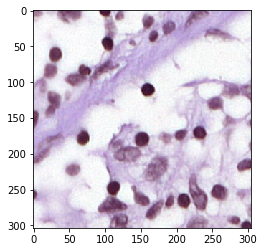

In [9]:
plt.imshow(normal_img[22])

100%|██████████| 82/82 [00:01<00:00, 68.92it/s]


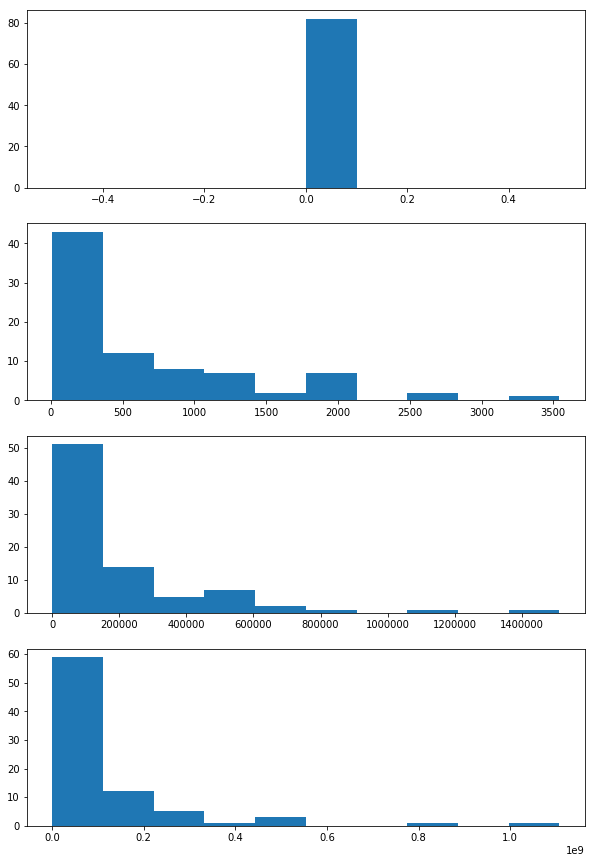

In [10]:
set_moment1 = []
set_moment2 = []
set_moment3 = []
set_moment4 = []
for i in tqdm.tqdm(range(np.shape(normal_img)[0])):
    R_img = Ricci_img_g(normal_img[i], k_size = 1)
    width, height  = R_img.shape
    R_reshape_img = np.reshape(R_img,(width * height))

    set_moment1.append(moment(R_reshape_img, moment = 1))
    set_moment2.append(moment(R_reshape_img, moment = 2))
    set_moment3.append(moment(R_reshape_img, moment = 3))
    set_moment4.append(moment(R_reshape_img, moment = 4))

plt.figure(figsize=(10,15))
plt.title('Norm Geom')
plt.subplot(4,1,1),plt.hist(set_moment1)
plt.subplot(4,1,2),plt.hist(set_moment2)
plt.subplot(4,1,3),plt.hist(set_moment3)
plt.subplot(4,1,4),plt.hist(set_moment4)
plt.show()

100%|██████████| 82/82 [00:00<00:00, 99.18it/s]


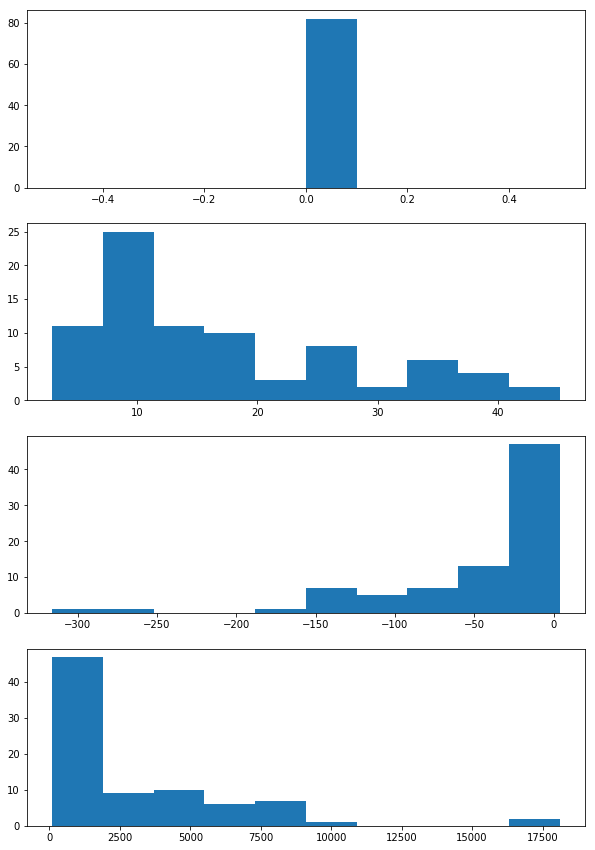

In [11]:
set_moment1 = []
set_moment2 = []
set_moment3 = []
set_moment4 = []
for i in tqdm.tqdm(range(np.shape(normal_img)[0])):
    R_img = Ricci_img_c(normal_img[i])
    width, height  = R_img.shape
    R_reshape_img = np.reshape(R_img,(width * height))

    set_moment1.append(moment(R_reshape_img, moment = 1))
    set_moment2.append(moment(R_reshape_img, moment = 2))
    set_moment3.append(moment(R_reshape_img, moment = 3))
    set_moment4.append(moment(R_reshape_img, moment = 4))

plt.figure(figsize=(10,15))
plt.title('Norm com')
plt.subplot(4,1,1),plt.hist(set_moment1)
plt.subplot(4,1,2),plt.hist(set_moment2)
plt.subplot(4,1,3),plt.hist(set_moment3)
plt.subplot(4,1,4),plt.hist(set_moment4)
plt.show()

100%|██████████| 82/82 [00:01<00:00, 69.90it/s]


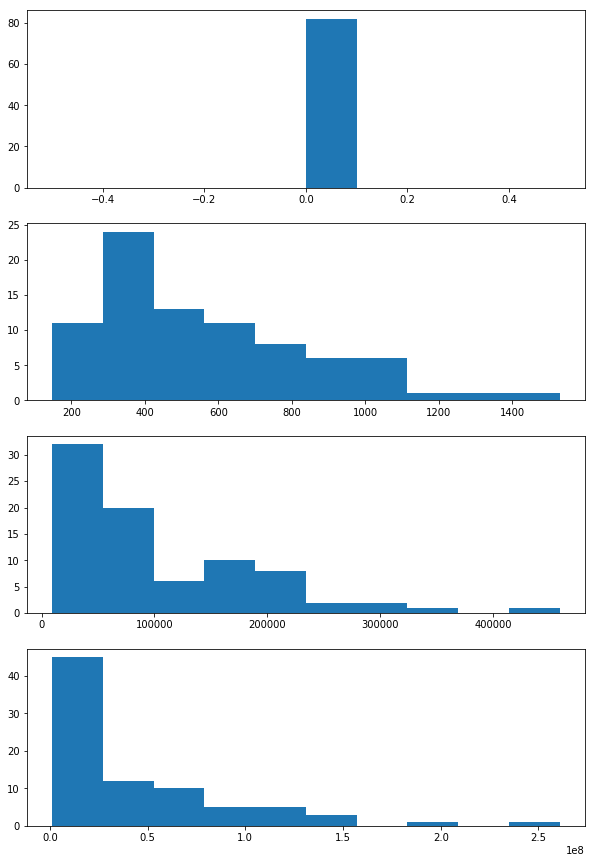

In [12]:
set_moment1 = []
set_moment2 = []
set_moment3 = []
set_moment4 = []
for i in tqdm.tqdm(range(np.shape(tumor_img)[0])):
    R_img = Ricci_img_g(tumor_img[i], k_size = 1)
    width, height  = R_img.shape
    R_reshape_img = np.reshape(R_img,(width * height))

    set_moment1.append(moment(R_reshape_img, moment = 1))
    set_moment2.append(moment(R_reshape_img, moment = 2))
    set_moment3.append(moment(R_reshape_img, moment = 3))
    set_moment4.append(moment(R_reshape_img, moment = 4))

plt.figure(figsize=(10,15))
plt.title('Tumor Geom')
plt.subplot(4,1,1),plt.hist(set_moment1)
plt.subplot(4,1,2),plt.hist(set_moment2)
plt.subplot(4,1,3),plt.hist(set_moment3)
plt.subplot(4,1,4),plt.hist(set_moment4)
plt.show()

100%|██████████| 82/82 [00:00<00:00, 100.64it/s]


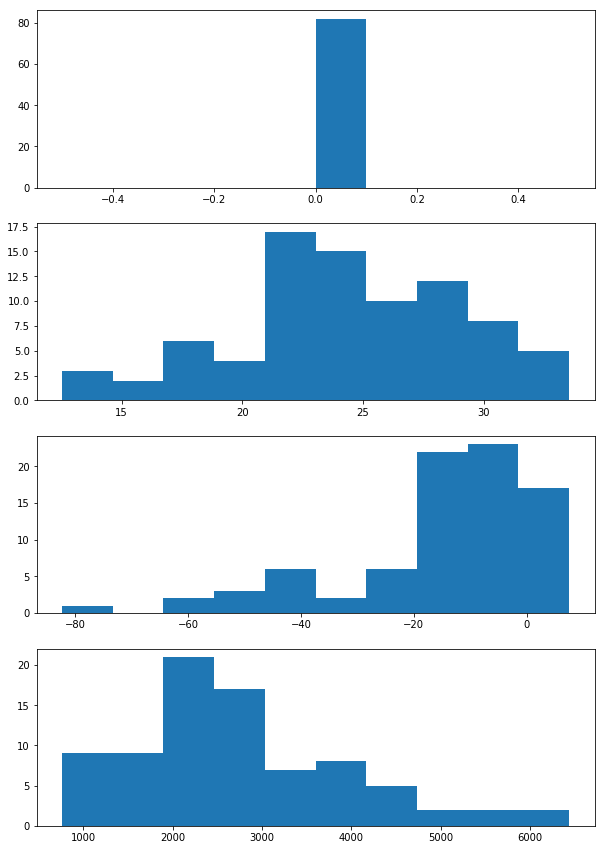

In [13]:
set_moment1 = []
set_moment2 = []
set_moment3 = []
set_moment4 = []
for i in tqdm.tqdm(range(np.shape(tumor_img)[0])):
    R_img = Ricci_img_c(tumor_img[i])
    width, height  = R_img.shape
    R_reshape_img = np.reshape(R_img,(width * height))

    set_moment1.append(moment(R_reshape_img, moment = 1))
    set_moment2.append(moment(R_reshape_img, moment = 2))
    set_moment3.append(moment(R_reshape_img, moment = 3))
    set_moment4.append(moment(R_reshape_img, moment = 4))

plt.figure(figsize=(10,15))
plt.title('Tumor Geom')
plt.subplot(4,1,1),plt.hist(set_moment1)
plt.subplot(4,1,2),plt.hist(set_moment2)
plt.subplot(4,1,3),plt.hist(set_moment3)
plt.subplot(4,1,4),plt.hist(set_moment4)
plt.show()

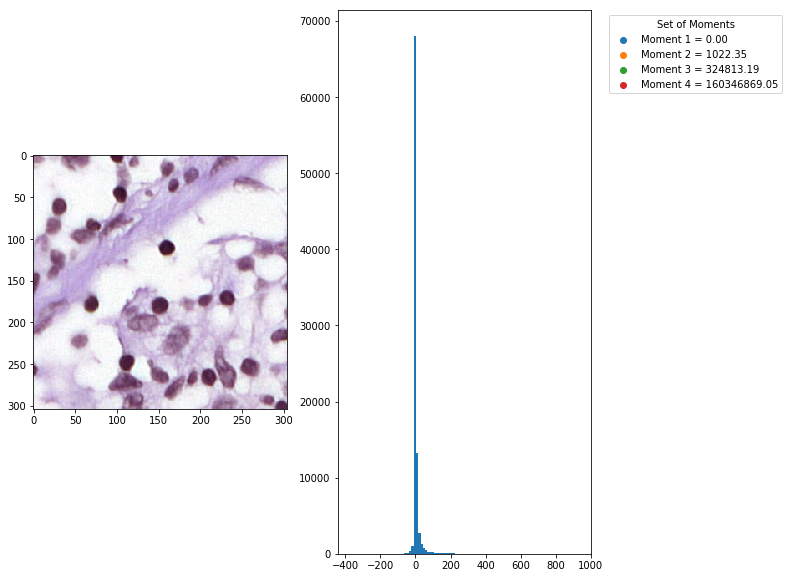

In [14]:
R_img_n = Ricci_img_g(normal_img[22], k_size = 1)
width, height  = R_img_n.shape
R_reshape_img_n = np.reshape(R_img_n,(width * height))

Moment1 = moment(R_reshape_img_n, moment = 1)
Moment2 = moment(R_reshape_img_n, moment = 2)
Moment3 = moment(R_reshape_img_n, moment = 3)
Moment4 = moment(R_reshape_img_n, moment = 4)

plt.figure(figsize=(10,10))
plt.title('Hist for Normal with Geometry weight')
plt.subplot(1,2,1), plt.imshow(normal_img[22])
plt.subplot(1,2,2), plt.hist(R_reshape_img_n, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')

plt.show()

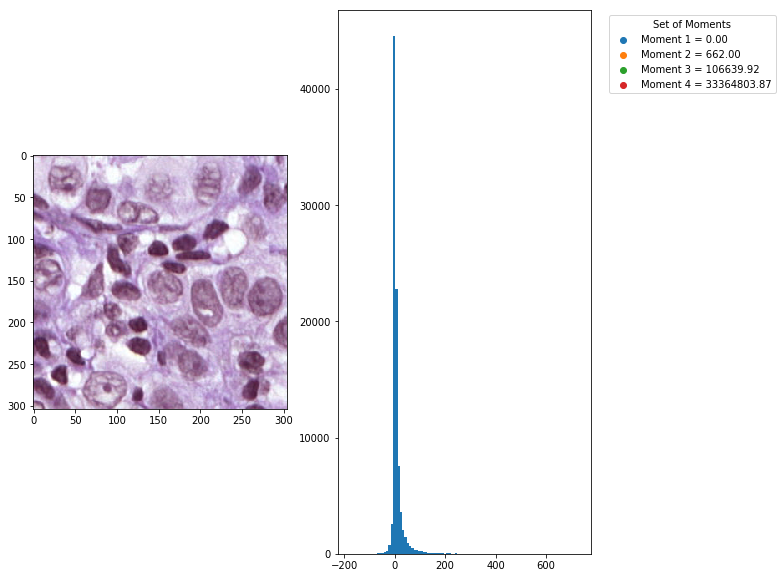

In [15]:
R_img_t = Ricci_img_g(tumor_img[22], k_size = 1)
width, height  = R_img_t.shape
R_reshape_img_t = np.reshape(R_img_t,(width * height))

Moment1 = moment(R_reshape_img_t, moment = 1)
Moment2 = moment(R_reshape_img_t, moment = 2)
Moment3 = moment(R_reshape_img_t, moment = 3)
Moment4 = moment(R_reshape_img_t, moment = 4)

plt.figure(figsize=(10, 10))
plt.title('Hist for Tumor with Geometry weight')
plt.subplot(1,2,1), plt.imshow(tumor_img[22])
plt.subplot(1,2,2), plt.hist(R_reshape_img_t, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')

plt.show()

In [16]:
from sklearn import metrics

metrics.mutual_info_score(R_reshape_img_n, R_reshape_img_t)

11.407503336229686

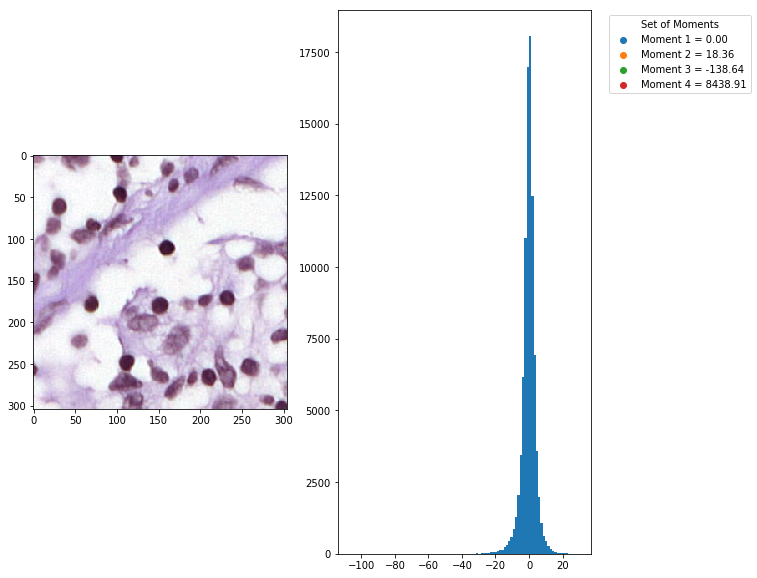

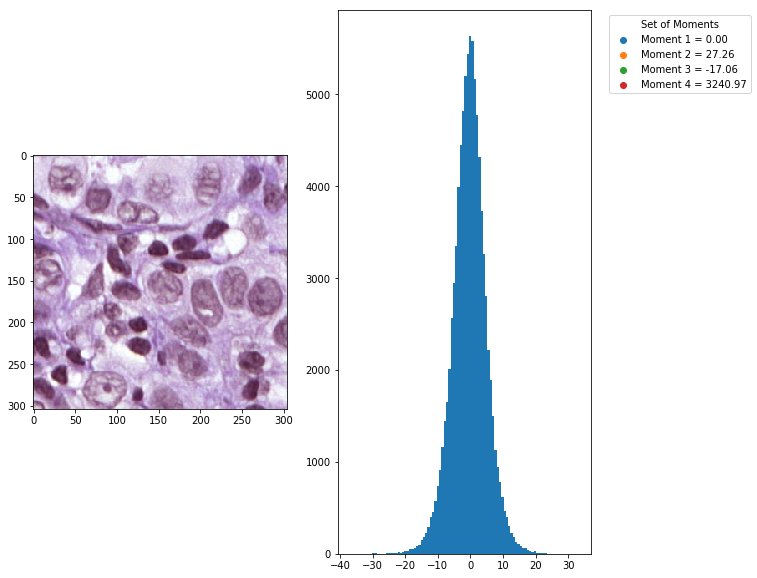

11.407564949312402


In [17]:
R_img_n = Ricci_img_c(normal_img[22])
width, height  = R_img_n.shape
R_reshape_img_n = np.reshape(R_img_n,(width * height))

Moment1 = moment(R_reshape_img_n, moment = 1)
Moment2 = moment(R_reshape_img_n, moment = 2)
Moment3 = moment(R_reshape_img_n, moment = 3)
Moment4 = moment(R_reshape_img_n, moment = 4)

plt.figure(figsize=(10,10))
plt.title('Hist for Normal with Com weight')
plt.subplot(1,2,1), plt.imshow(normal_img[22])
plt.subplot(1,2,2), plt.hist(R_reshape_img_n, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')

plt.show()

R_img_t = Ricci_img_c(tumor_img[22])
width, height  = R_img_t.shape
R_reshape_img_t = np.reshape(R_img_t,(width * height))

Moment1 = moment(R_reshape_img_t, moment = 1)
Moment2 = moment(R_reshape_img_t, moment = 2)
Moment3 = moment(R_reshape_img_t, moment = 3)
Moment4 = moment(R_reshape_img_t, moment = 4)

plt.figure(figsize=(10, 10))
plt.title('Hist for Tumor with Com weight')
plt.subplot(1,2,1), plt.imshow(tumor_img[22])
plt.subplot(1,2,2), plt.hist(R_reshape_img_t, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')

plt.show()

print(metrics.mutual_info_score(R_reshape_img_n, R_reshape_img_t))

Random =  25


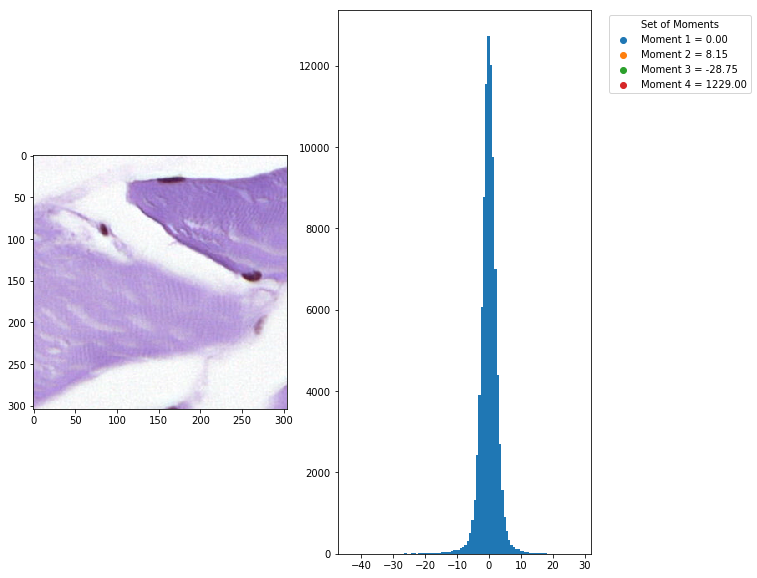

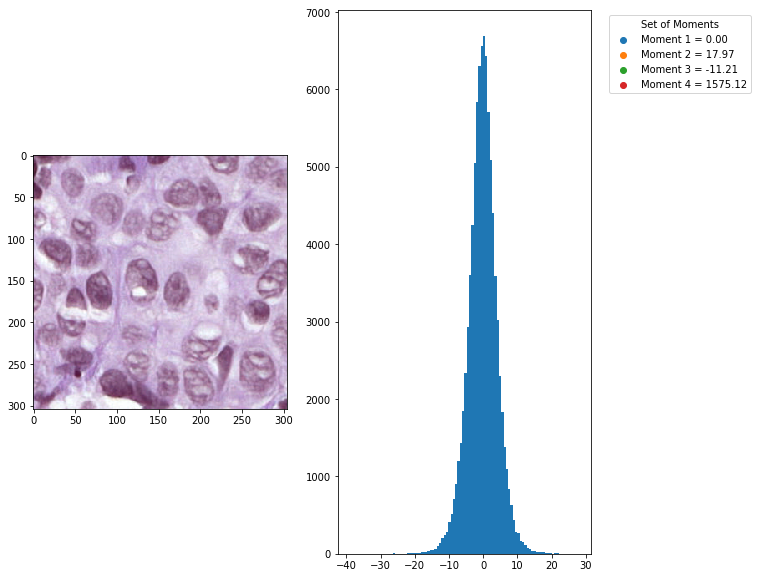

Kullback–Leibler divergence: 11.407564949312402


In [18]:
from random import randint

random = randint(0,np.shape(normal_img)[0])

print('Random = ', random)

R_img_n = Ricci_img_c(normal_img[random])
width, height  = R_img_n.shape
R_reshape_img_n = np.reshape(R_img_n,(width * height))

Moment1 = moment(R_reshape_img_n, moment = 1)
Moment2 = moment(R_reshape_img_n, moment = 2)
Moment3 = moment(R_reshape_img_n, moment = 3)
Moment4 = moment(R_reshape_img_n, moment = 4)

plt.figure(figsize=(10,10))
plt.title('Hist for Normal with Com weight')
plt.subplot(1,2,1), plt.imshow(normal_img[random])
plt.subplot(1,2,2), plt.hist(R_reshape_img_n, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')

plt.show()

R_img_t = Ricci_img_c(tumor_img[random])
width, height  = R_img_t.shape
R_reshape_img_t = np.reshape(R_img_t,(width * height))

Moment1 = moment(R_reshape_img_t, moment = 1)
Moment2 = moment(R_reshape_img_t, moment = 2)
Moment3 = moment(R_reshape_img_t, moment = 3)
Moment4 = moment(R_reshape_img_t, moment = 4)

plt.figure(figsize=(10, 10))
plt.title('Hist for Tumor with Com weight')
plt.subplot(1,2,1), plt.imshow(tumor_img[random])
plt.subplot(1,2,2), plt.hist(R_reshape_img_t, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')

plt.show()

print('Kullback–Leibler divergence:',metrics.mutual_info_score(R_reshape_img_n, R_reshape_img_t))

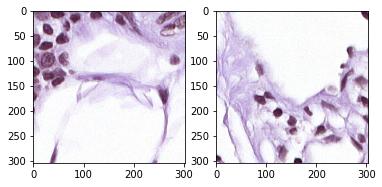

In [19]:
plt.subplot(1,2,1), plt.imshow(normal_img[36])
plt.subplot(1,2,2), plt.imshow(normal_img[81])
plt.show()

In [20]:
from collections import Counter

border_1 = normal_img[36]
border_2 = normal_img[81]

print(np.unique(border_1, return_counts=True))

(array([ 24,  25,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 2

Random =  2
wh = 74.09719817636196 %


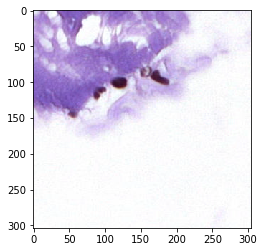

In [21]:
random = randint(0,np.shape(normal_img)[0]-1)

print('Random = ', random)

img_w_test = normal_img[random]
plt.imshow(img_w_test)

u, c  = np.unique(img_w_test, return_counts=True)

wh =len(u[u>220])

pr = sum(c[len(c)-wh:len(c)])/sum(c) * 100
print('wh =', pr,'%')

In [22]:
print(u[len(c)-25:len(c)],c[len(c)-25:len(c)])

[231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255] [  961   962  1009  1063  1081  1186  1207  1245  1319  1572  1592  1776
  2008  2227  2613  3340  4436  6497  9321 14143 20698 28141 34225 30671
 22853]


In [23]:
u

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

100%|██████████| 82/82 [00:01<00:00, 65.29it/s]


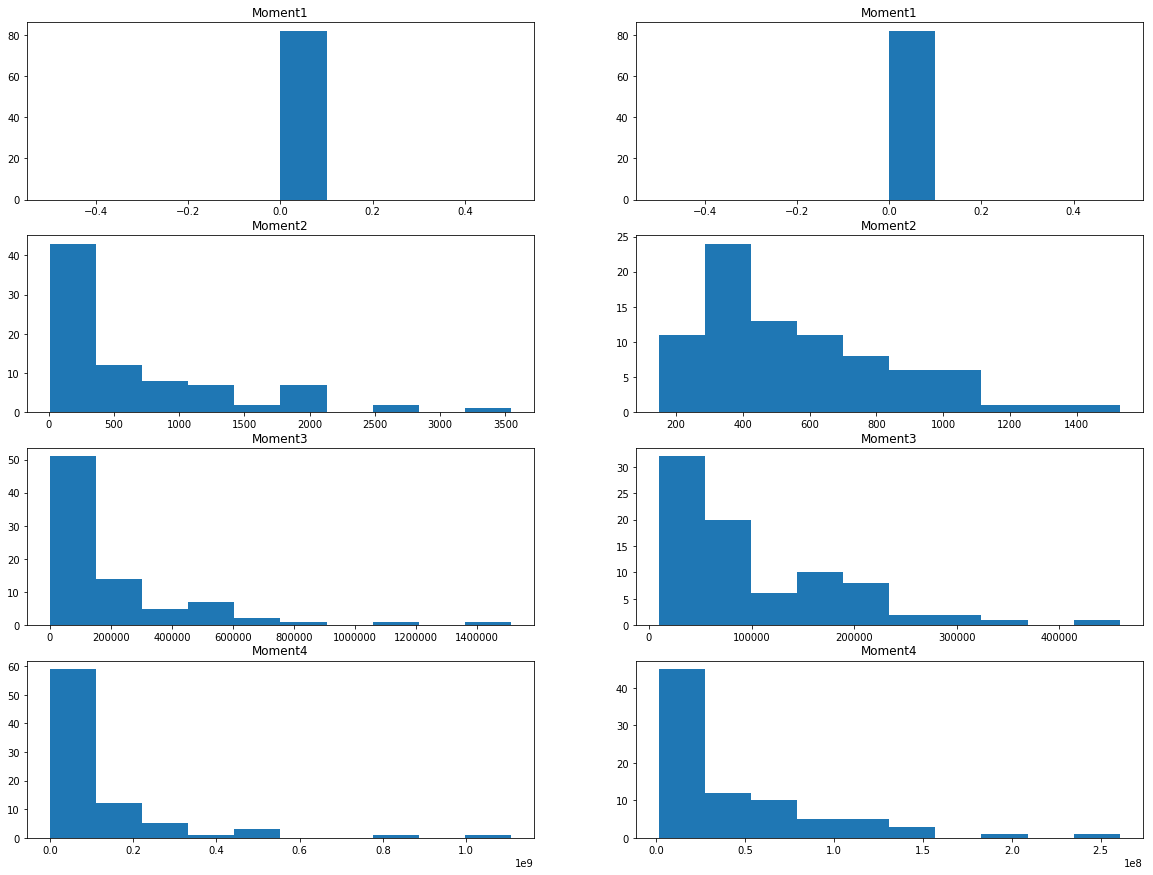

Kullback–Leibler divergence
Moment 1 = 0.00
Moment 2 = 4.41
Moment 3 = 4.41
Moment 4 = 4.41


In [24]:
set_moment1_n = []
set_moment2_n = []
set_moment3_n = []
set_moment4_n = []

set_moment1_t = []
set_moment2_t = []
set_moment3_t = []
set_moment4_t = []

for i in tqdm.tqdm(range(np.shape(normal_img)[0])):
    R_img = Ricci_img_g(normal_img[i], k_size = 1)
    width, height  = R_img.shape
    R_reshape_img_n = np.reshape(R_img,(width * height))
    
    set_moment1_n.append(moment(R_reshape_img_n, moment = 1))
    set_moment2_n.append(moment(R_reshape_img_n, moment = 2))
    set_moment3_n.append(moment(R_reshape_img_n, moment = 3))
    set_moment4_n.append(moment(R_reshape_img_n, moment = 4))
    
for i in tqdm.tqdm(range(np.shape(tumor_img)[0])):
    R_img = Ricci_img_g(tumor_img[i], k_size = 1)
    width, height  = R_img.shape
    R_reshape_img_t = np.reshape(R_img,(width * height))
    
    set_moment1_t.append(moment(R_reshape_img_t, moment = 1))
    set_moment2_t.append(moment(R_reshape_img_t, moment = 2))
    set_moment3_t.append(moment(R_reshape_img_t, moment = 3))
    set_moment4_t.append(moment(R_reshape_img_t, moment = 4))

plt.figure(figsize=(20,15))

plt.subplot(4,2,1),plt.title('Moment1'),plt.hist(set_moment1_n)
plt.subplot(4,2,3),plt.title('Moment2'),plt.hist(set_moment2_n)
plt.subplot(4,2,5),plt.title('Moment3'),plt.hist(set_moment3_n)
plt.subplot(4,2,7),plt.title('Moment4'),plt.hist(set_moment4_n)


plt.subplot(4,2,2),plt.title('Moment1'),plt.hist(set_moment1_t)
plt.subplot(4,2,4),plt.title('Moment2'),plt.hist(set_moment2_t)
plt.subplot(4,2,6),plt.title('Moment3'),plt.hist(set_moment3_t)
plt.subplot(4,2,8),plt.title('Moment4'),plt.hist(set_moment4_t)

plt.show()

print('Kullback–Leibler divergence')
print('Moment 1 = '"%.2f" % metrics.mutual_info_score(set_moment1_n, set_moment1_t))
print('Moment 2 = '"%.2f" % metrics.mutual_info_score(set_moment2_n, set_moment2_t))
print('Moment 3 = '"%.2f" % metrics.mutual_info_score(set_moment3_n, set_moment3_t))
print('Moment 4 = '"%.2f" % metrics.mutual_info_score(set_moment4_n, set_moment4_t))

In [25]:
import math
from sklearn import preprocessing
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.misc import imresize


#Calculates diffusion distance of two histograms(given as parameters)
def diffusionDistance(h1, h2):
    shape = list(h1.shape)
    
    #d_0 is the difference between two histograms
    d_prev = np.subtract(h1, h2)
    
    #K at t=0 is L1 norm of d_0
    K = np.sum(np.absolute(d_prev))
    
    #Till the d matrix downsamples to size 1
    while(min(shape) > 1):
    
        #Applying gaussian filter over d_prev before downsampling
        d = gaussian_filter(d_prev, sigma = 0.05)

        #downsampling upto 50%
        d = imresize(d, 0.5, interp='nearest')

        #Summing the L1 norm of d to K
        K = K + np.sum(np.absolute(d))
        shape = list(d.shape)
        d_prev = d
    #Outputting the diffusion distance
    return K

Random =  60


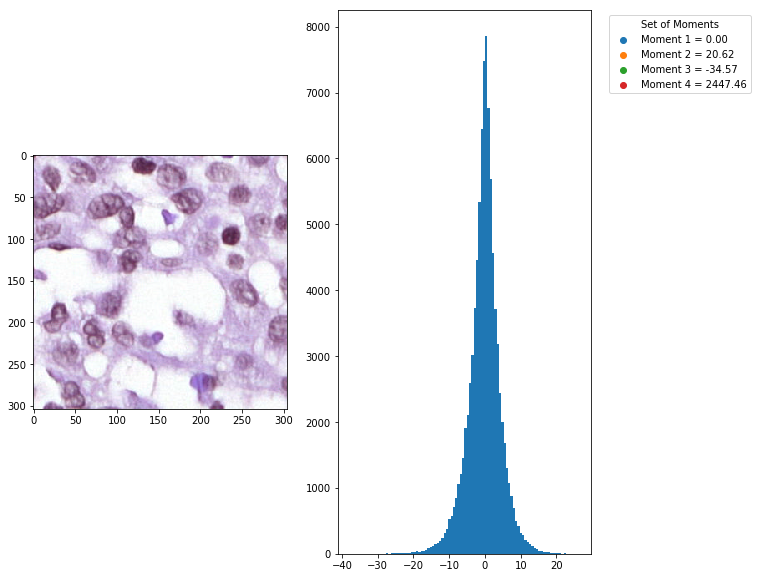

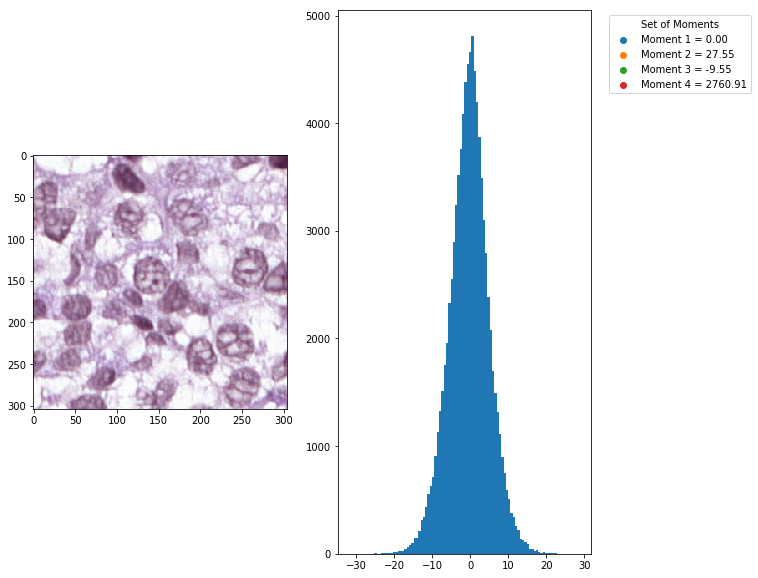

484860.09772294597


In [26]:
from random import randint

random = randint(0,np.shape(normal_img)[0])

print('Random = ', random)

R_img_n = Ricci_img_c(normal_img[random])
width, height  = R_img_n.shape
R_reshape_img_n = np.reshape(R_img_n,(width * height))

Moment1 = moment(R_reshape_img_n, moment = 1)
Moment2 = moment(R_reshape_img_n, moment = 2)
Moment3 = moment(R_reshape_img_n, moment = 3)
Moment4 = moment(R_reshape_img_n, moment = 4)

plt.figure(figsize=(10,10))
plt.title('Hist for Normal with Com weight')
plt.subplot(1,2,1), plt.imshow(normal_img[random])
plt.subplot(1,2,2), plt.hist(R_reshape_img_n, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')

plt.show()

R_img_t = Ricci_img_c(tumor_img[random])
width, height  = R_img_t.shape
R_reshape_img_t = np.reshape(R_img_t,(width * height))

Moment1 = moment(R_reshape_img_t, moment = 1)
Moment2 = moment(R_reshape_img_t, moment = 2)
Moment3 = moment(R_reshape_img_t, moment = 3)
Moment4 = moment(R_reshape_img_t, moment = 4)

plt.figure(figsize=(10, 10))
plt.title('Hist for Tumor with Com weight')
plt.subplot(1,2,1), plt.imshow(tumor_img[random])
plt.subplot(1,2,2), plt.hist(R_reshape_img_t, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')

plt.show()

R_reshape_img_n = np.reshape(R_reshape_img_n,[R_reshape_img_n.shape[0],1])
R_reshape_img_t = np.reshape(R_reshape_img_t,[R_reshape_img_t.shape[0],1])

DR = diffusionDistance(R_reshape_img_n, R_reshape_img_t)

print(DR)

Random =  74


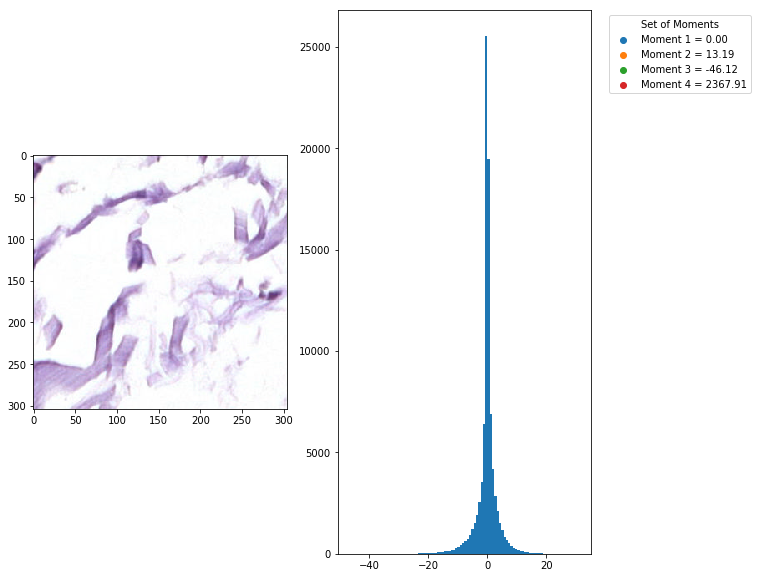

Random =  40


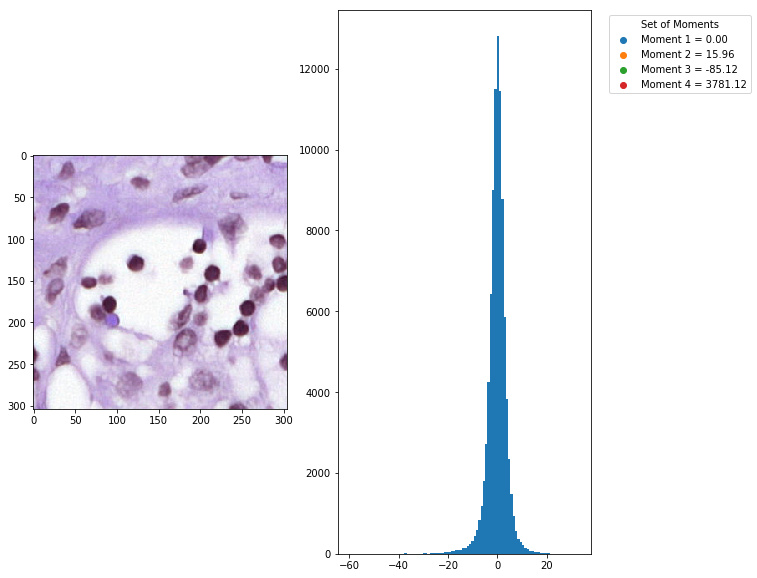

331722.42242325714


In [27]:
from random import randint

random_1 = randint(0,np.shape(normal_img)[0]-1)

print('Random = ', random_1)

R_img_n = Ricci_img_c(normal_img[random_1])
width, height  = R_img_n.shape
R_reshape_img_n = np.reshape(R_img_n,(width * height))

Moment1 = moment(R_reshape_img_n, moment = 1)
Moment2 = moment(R_reshape_img_n, moment = 2)
Moment3 = moment(R_reshape_img_n, moment = 3)
Moment4 = moment(R_reshape_img_n, moment = 4)

plt.figure(figsize=(10,10))
plt.title('Hist for Normal with Com weight')
plt.subplot(1,2,1), plt.imshow(normal_img[random_1])
plt.subplot(1,2,2), plt.hist(R_reshape_img_n, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')

plt.show()

random_2 = randint(0,np.shape(normal_img)[0]-1)

print('Random = ', random_2)

R_img_t = Ricci_img_c(normal_img[random_2])
width, height  = R_img_t.shape
R_reshape_img_t = np.reshape(R_img_t,(width * height))

Moment1 = moment(R_reshape_img_t, moment = 1)
Moment2 = moment(R_reshape_img_t, moment = 2)
Moment3 = moment(R_reshape_img_t, moment = 3)
Moment4 = moment(R_reshape_img_t, moment = 4)

plt.figure(figsize=(10, 10))
plt.title('Hist for Tumor with Com weight')
plt.subplot(1,2,1), plt.imshow(normal_img[random_2])
plt.subplot(1,2,2), plt.hist(R_reshape_img_t, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')

plt.show()

R_reshape_img_n = np.reshape(R_reshape_img_n,[R_reshape_img_n.shape[0],1])
R_reshape_img_t = np.reshape(R_reshape_img_t,[R_reshape_img_t.shape[0],1])

DR = diffusionDistance(R_reshape_img_n, R_reshape_img_t)

print(DR)

Random =  77


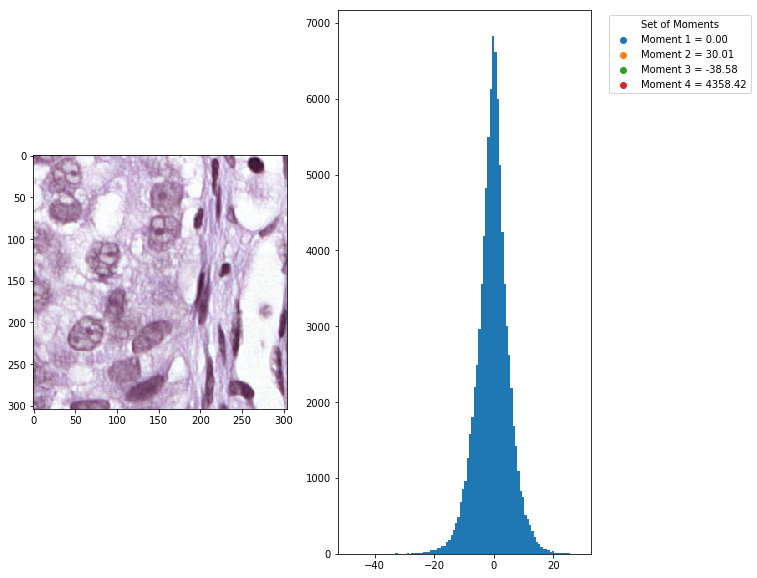

Random =  52


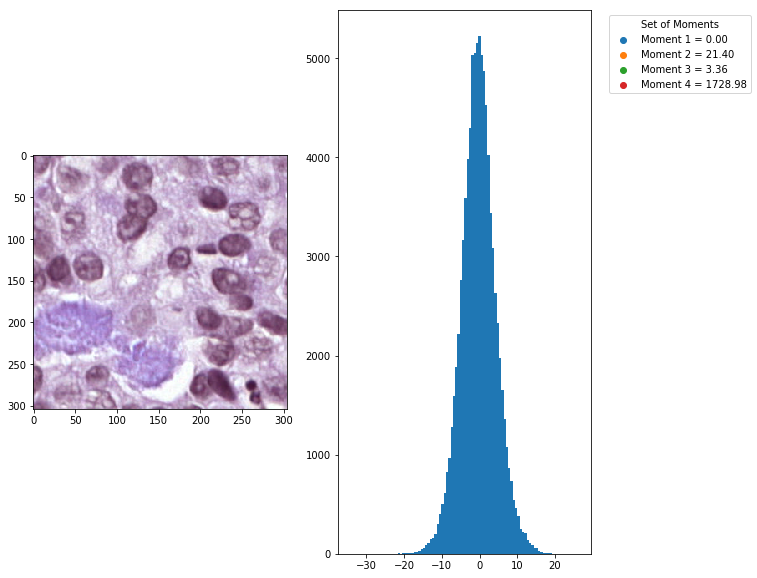

500951.7890342176


In [29]:
from random import randint

random_1 = randint(0,np.shape(tumor_img)[0]-1)

print('Random = ', random_1)

R_img_n = Ricci_img_c(tumor_img[random_1])
width, height  = R_img_n.shape
R_reshape_img_n = np.reshape(R_img_n,(width * height))

Moment1 = moment(R_reshape_img_n, moment = 1)
Moment2 = moment(R_reshape_img_n, moment = 2)
Moment3 = moment(R_reshape_img_n, moment = 3)
Moment4 = moment(R_reshape_img_n, moment = 4)

plt.figure(figsize=(10,10))
plt.title('Hist for Normal with Com weight')
plt.subplot(1,2,1), plt.imshow(tumor_img[random_1])
plt.subplot(1,2,2), plt.hist(R_reshape_img_n, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')

plt.show()

random_2 = randint(0,np.shape(tumor_img)[0]-1)

print('Random = ', random_2)

R_img_t = Ricci_img_c(tumor_img[random_2])
width, height  = R_img_t.shape
R_reshape_img_t = np.reshape(R_img_t,(width * height))

Moment1 = moment(R_reshape_img_t, moment = 1)
Moment2 = moment(R_reshape_img_t, moment = 2)
Moment3 = moment(R_reshape_img_t, moment = 3)
Moment4 = moment(R_reshape_img_t, moment = 4)

plt.figure(figsize=(10, 10))
plt.title('Hist for Tumor with Com weight')
plt.subplot(1,2,1), plt.imshow(tumor_img[random_2])
plt.subplot(1,2,2), plt.hist(R_reshape_img_t, 100)

for area in ['Moment 1 = '"%.2f" % Moment1, 'Moment 2 = '"%.2f" % Moment2, 'Moment 3 = '"%.2f" % Moment3, 'Moment 4 = '"%.2f" % Moment4]:
    plt.scatter([], [], label=str(area))

plt.legend( bbox_to_anchor=(1.05, 1), loc=2,title='Set of Moments')


plt.show()

R_reshape_img_n = np.reshape(R_reshape_img_n,[R_reshape_img_n.shape[0],1])
R_reshape_img_t = np.reshape(R_reshape_img_t,[R_reshape_img_t.shape[0],1])

DR = diffusionDistance(R_reshape_img_n, R_reshape_img_t)

print(DR)